In [4]:
# import packages
import json
import glob
import pandas as pd
import numpy as np
import datetime as dt
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from google.colab import drive
from sklearn.model_selection import train_test_split
from collections import Counter
import seaborn as sns

In [5]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

In [6]:
! apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [7]:
%%capture
!apt update
!pip install kaggle

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!mkdir ~/.kaggle

In [10]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [11]:
!!kaggle datasets download -d theworldbank/health-nutrition-and-population-statistics

['Downloading health-nutrition-and-population-statistics.zip to /content',
 '',
 '  0% 0.00/14.0M [00:00<?, ?B/s]',
 ' 43% 6.00M/14.0M [00:00<00:00, 60.8MB/s]',
 ' 93% 13.0M/14.0M [00:00<00:00, 64.6MB/s]',
 '',
 '100% 14.0M/14.0M [00:00<00:00, 66.3MB/s]']

In [12]:
!unzip /content/health-nutrition-and-population-statistics.zip

Archive:  /content/health-nutrition-and-population-statistics.zip
  inflating: data.csv                


In [13]:
country_health_data_df = pd.read_csv('data.csv')
country_health_data_df

Country Name Country Code  \
0       Arab World          ARB   
1       Arab World          ARB   
2       Arab World          ARB   
3       Arab World          ARB   
4       Arab World          ARB   
...            ...          ...   
89005     Zimbabwe          ZWE   
89006     Zimbabwe          ZWE   
89007     Zimbabwe          ZWE   
89008     Zimbabwe          ZWE   
89009     Zimbabwe          ZWE   

                                          Indicator Name     Indicator Code  \
0      % of females ages 15-49 having comprehensive c...  SH.HIV.KNOW.FE.ZS   
1      % of males ages 15-49 having comprehensive cor...  SH.HIV.KNOW.MA.ZS   
2      Adolescent fertility rate (births per 1,000 wo...        SP.ADO.TFRT   
3      Adults (ages 15+) and children (0-14 years) li...        SH.HIV.TOTL   
4      Adults (ages 15+) and children (ages 0-14) new...     SH.HIV.INCD.TL   
...                                                  ...                ...   
89005  Use of insecticide-treated bed nets (% of unde...     SH.MLR.NETS.ZS   
89006  Use of Intermittent Preventive Treatment of ma...     SH.MLR.SPF2.ZS   
89007  Vitamin A supplementation coverage rate (% of ...     SN.ITK.VITA.ZS   
89008           Wanted fertility rate (births per woman)        SP.DYN.WFRT   
89009  Women's share of population ages 15+ living wi...  SH.DYN.AIDS.FE.ZS   

        1960   1961   1962   1963   1964   1965   1966   1967   1968   1969  \
0        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2     133.56 134.16 134.86 134.50 134.11 133.57 132.68 131.67 129.19 126.74   
3        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
89005    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
89006    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
89007    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
89008    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
89009    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

        1970   1971   1972   1973   1974   1975   1976   1977   1978   1979  \
0        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2     124.38 122.13 120.02 118.09 116.13 114.10 111.98 109.78 106.03 102.34   
3        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
89005    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
89006    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
89007    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
89008    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
89009    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  1990  1991  \
0       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2     98.74 95.24 91.79 88.00 84.21 80.36 76.44 72.51 71.17 69.89 69.00 67.76   
3       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
89005   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
89006   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
89007   N

In [14]:
country_health_data_df.describe()

1960          1961          1962          1963          1964  \
count      35482.00      35325.00      35889.00      35452.00      35483.00   
mean     4398856.44    4477329.49    4483278.56    4634875.23    4727806.09   
std     49482448.09   50132050.02   50544730.50   51921216.45   52978486.03   
min           -2.37         -2.50   -3826648.00         -3.21         -3.08   
25%           19.08         21.30         17.90         22.28         22.37   
50%         5282.00       5794.00       5158.00       5945.00       6065.00   
75%        99935.25     103400.00     102584.00     107848.75     110750.00   
max   3035055570.00 3076120548.00 3129063789.00 3193947306.00 3259354557.00   

               1965          1966          1967          1968          1969  \
count      35603.00      35538.00      36022.00      35577.00      35630.00   
mean     4810556.78    4923225.20    4958679.61    5126161.63    5229267.38   
std     54019877.27   55260060.91   56070261.93   57632630.68   58872769.53   
min           -2.98         -3.07   -4094255.00         -4.26         -4.65   
25%           20.13         21.96         17.80         22.27         22.37   
50%         5998.00       6240.00       5767.00       6438.00       6529.50   
75%       112576.50     115631.25     115188.75     121197.00     124361.50   
max   3326054230.00 3395866317.00 3465297420.00 3535511844.00 3609910116.00   

               1970          1971          1972          1973          1974  \
count      36910.00      37578.00      38015.00      37542.00      37574.00   
mean     5155626.33    5172671.91    5219277.07    5392698.79    5495348.79   
std     59133103.81   59906327.90   60835127.60   62478457.35   63710749.55   
min           -5.20        -12.61   -7032007.00        -14.86        -15.82   
25%           18.03         19.26         17.28         20.29         20.11   
50%         4448.00       3634.50       3429.00       3897.50       3946.00   
75%       115518.00     113294.75     113392.50     119192.50     121589.50   
max   3684996710.00 3762289912.00 3839015704.00 3914800478.00 3991194334.00   

               1975          1976          1977          1978          1979  \
count      37760.00      37778.00      38204.00      37797.00      37848.00   
mean     5572801.21    5672413.02    5708966.44    5874534.11    5972024.87   
std     64784123.57   65957414.14   66764707.11   68315878.24   69489877.74   
min         -187.15        -17.36   -8095133.00        -18.44        -18.85   
25%           19.31         20.66         17.69         20.95         20.80   
50%         3818.00       3901.00       3625.50       4122.00       4148.00   
75%       122248.75     124952.50     125257.00     129987.00     132313.75   
max   4065954672.00 4138731185.00 4211259460.00 4285061775.00 4360572310.00   

               1980          1981          1982          1983          1984  \
count      38578.00      38829.00      39182.00      38772.00      38964.00   
mean     5963503.22    6031162.21    6085732.84    6262494.66    6342689.59   
std     70059081.08   71086257.87   72082429.09   73803599.99   74958346.82   
min          -12.85        -13.88   -7150407.00        -15.25        -14.87   
25%           19.17         19.72         18.14         21.63         21.10   
50%         3186.50       2996.00       2998.00       3367.50       3186.00   
75%       128691.00     128815.00     130577.75     135377.25     136141.00   
max   4436734568.00 4514655817.00 4595487517.00 4677020244.00 4758310418.00   

               1985          1986          1987          1988          1989  \
count      39020.00      39367.00      39832.00      39166.00      39282.00   
mean     6447204.70    6506767.80    6548053.41    6781519.41    6881397.60   
std     76270157.44   77326953.96   78303341.51   80412482.76   81735065.71   
min          -15.07        -19.53   -8501035.00        -61.23        -61.37   
25%           21.18         21.20         18.53         22.6

In [15]:
country_health_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89010 entries, 0 to 89009
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    89010 non-null  object 
 1   Country Code    89010 non-null  object 
 2   Indicator Name  89010 non-null  object 
 3   Indicator Code  89010 non-null  object 
 4   1960            35482 non-null  float64
 5   1961            35325 non-null  float64
 6   1962            35889 non-null  float64
 7   1963            35452 non-null  float64
 8   1964            35483 non-null  float64
 9   1965            35603 non-null  float64
 10  1966            35538 non-null  float64
 11  1967            36022 non-null  float64
 12  1968            35577 non-null  float64
 13  1969            35630 non-null  float64
 14  1970            36910 non-null  float64
 15  1971            37578 non-null  float64
 16  1972            38015 non-null  float64
 17  1973            37542 non-null 

In [16]:
num_dups = int(len(country_health_data_df[country_health_data_df.duplicated()]))
num_dups

0

In [17]:
country_health_data_df = country_health_data_df.drop(columns=['Unnamed: 60'])

In [18]:
melted_df = pd.melt(country_health_data_df, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Value')
melted_df.drop(['Country Code', 'Indicator Code'], axis=1, inplace=True)
transformed_data_df = melted_df.pivot_table(index=['Country Name', 'Year'], columns='Indicator Name', values='Value').reset_index()
transformed_data_df

Indicator Name Country Name  Year  \
0               Afghanistan  1960   
1               Afghanistan  1961   
2               Afghanistan  1962   
3               Afghanistan  1963   
4               Afghanistan  1964   
...                     ...   ...   
14443              Zimbabwe  2011   
14444              Zimbabwe  2012   
14445              Zimbabwe  2013   
14446              Zimbabwe  2014   
14447              Zimbabwe  2015   

Indicator Name  % of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)  \
0                                                             NaN                                                                       
1                                                             NaN                                                                       
2                                                             NaN                                                                       
3                                                             NaN                                                                       
4                                                             NaN                                                                       
...                                                           ...                                                                       
14443                                                       55.90                                                                       
14444                                                         NaN                                                                       
14445                                                         NaN                                                                       
14446                                                       62.50                                                                       
14447                                                         NaN                                                                       

Indicator Name  % of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)  \
0                                                             NaN                                                                     
1                                                             NaN                                                                     
2                                                             NaN                                                                     
3                                                             NaN                                                                     
4                                                             NaN                                                                     
...                                                           ...                                                                     
14443                                                       53.00                                                                     
14444                                                         NaN                                                                     
14445                                                         NaN                                                                     
14446                                                       59.60                                                                     
14447                                                         NaN                                                                     

Indicator Name  AIDS estimated deaths (UNAIDS estimates)  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                

In [19]:
non_valid_countries = [
    'Arab World', 'Caribbean small states', 'Central Europe and the Baltics',
    'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD countries)',
    'East Asia & Pacific (excluding high income)', 'Euro area', 'Europe & Central Asia',
    'Europe & Central Asia (IDA & IBRD countries)', 'Europe & Central Asia (excluding high income)',
    'European Union', 'Fragile and conflict affected situations', 'Heavily indebted poor countries (HIPC)',
    'High income', 'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only', 'IDA total',
    'Late-demographic dividend', 'Latin America & Caribbean', 'Latin America & Caribbean (excluding high income)',
    'Latin America & the Caribbean (IDA & IBRD countries)', 'Least developed countries: UN classification',
    'Low & middle income', 'Low income', 'Lower middle income', 'Middle East & North Africa',
    'Middle East & North Africa (IDA & IBRD countries)', 'Middle East & North Africa (excluding high income)',
    'Middle income', 'North America', 'OECD members', 'Other small states', 'Pacific island small states',
    'Post-demographic dividend', 'Pre-demographic dividend', 'Small states', 'South Asia',
    'South Asia (IDA & IBRD)', 'Sub-Saharan Africa', 'Sub-Saharan Africa (IDA & IBRD countries)',
    'Sub-Saharan Africa (excluding high income)', 'Upper middle income', 'World'
]

valid_transformed_df = transformed_data_df[~transformed_data_df['Country Name'].isin(non_valid_countries)]

# Reset the index
valid_transformed_df.reset_index(drop=True, inplace=True)
valid_transformed_df

Indicator Name Country Name  Year  \
0               Afghanistan  1960   
1               Afghanistan  1961   
2               Afghanistan  1962   
3               Afghanistan  1963   
4               Afghanistan  1964   
...                     ...   ...   
12147              Zimbabwe  2011   
12148              Zimbabwe  2012   
12149              Zimbabwe  2013   
12150              Zimbabwe  2014   
12151              Zimbabwe  2015   

Indicator Name  % of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)  \
0                                                             NaN                                                                       
1                                                             NaN                                                                       
2                                                             NaN                                                                       
3                                                             NaN                                                                       
4                                                             NaN                                                                       
...                                                           ...                                                                       
12147                                                       55.90                                                                       
12148                                                         NaN                                                                       
12149                                                         NaN                                                                       
12150                                                       62.50                                                                       
12151                                                         NaN                                                                       

Indicator Name  % of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)  \
0                                                             NaN                                                                     
1                                                             NaN                                                                     
2                                                             NaN                                                                     
3                                                             NaN                                                                     
4                                                             NaN                                                                     
...                                                           ...                                                                     
12147                                                       53.00                                                                     
12148                                                         NaN                                                                     
12149                                                         NaN                                                                     
12150                                                       59.60                                                                     
12151                                                         NaN                                                                     

Indicator Name  AIDS estimated deaths (UNAIDS estimates)  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                

In [20]:
# Calculate the threshold based on 30% null values in a row
threshold_percentage = 0.55

# Calculate the threshold count for null values based on the percentage
threshold_count = int(threshold_percentage * (len(valid_transformed_df.columns) - 2))

# Drop rows where the number of non-null values is less than the threshold count
filtered_health_data_df = valid_transformed_df.dropna(subset=valid_transformed_df.columns[2:], thresh=threshold_count)

# # fill null values using interpolation
filtered_health_data_df.interpolate(method='linear', axis=0, inplace=True)

# # forward fill the remaining values in 2015 that cannot be interpolated
# filtered_health_data_df.fillna(value=48.20, inplace=True)

# # Reset the index
filtered_health_data_df.reset_index(drop=True, inplace=True)

filtered_health_data_df

<ipython-input-20-7420bc39b95e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_health_data_df.interpolate(method='linear', axis=0, inplace=True)


Indicator Name Country Name  Year  \
0               Afghanistan  1990   
1               Afghanistan  1991   
2               Afghanistan  1992   
3               Afghanistan  1993   
4               Afghanistan  1994   
...                     ...   ...   
5186               Zimbabwe  2011   
5187               Zimbabwe  2012   
5188               Zimbabwe  2013   
5189               Zimbabwe  2014   
5190               Zimbabwe  2015   

Indicator Name  % of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)  \
0                                                             NaN                                                                       
1                                                             NaN                                                                       
2                                                             NaN                                                                       
3                                                             NaN                                                                       
4                                                             NaN                                                                       
...                                                           ...                                                                       
5186                                                        55.90                                                                       
5187                                                        58.10                                                                       
5188                                                        60.30                                                                       
5189                                                        62.50                                                                       
5190                                                        62.50                                                                       

Indicator Name  % of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)  \
0                                                             NaN                                                                     
1                                                             NaN                                                                     
2                                                             NaN                                                                     
3                                                             NaN                                                                     
4                                                             NaN                                                                     
...                                                           ...                                                                     
5186                                                        53.00                                                                     
5187                                                        55.20                                                                     
5188                                                        57.40                                                                     
5189                                                        59.60                                                                     
5190                                                        59.60                                                                     

Indicator Name  AIDS estimated deaths (UNAIDS estimates)  \
0                                                 100.00   
1                                                 100.00   
2                                                 100.00   
3                                                

In [21]:
null_values = filtered_health_data_df.isnull().sum().sum()
if null_values == 0:
    print("There are no null values in the DataFrame.")
else:
    print("There are still some null values in the DataFrame.")

There are still some null values in the DataFrame.


In [22]:
null_count_per_column = filtered_health_data_df.isnull().sum(axis=0)

print("\nNull entries per column:")
null_count_per_column


Null entries per column:


Indicator Name
Country Name                                                                                                              0
Year                                                                                                                      0
% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)    21
% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)      45
AIDS estimated deaths (UNAIDS estimates)                                                                                  0
                                                                                                                         ..
Use of any antimalarial drug (% of pregnant women)                                                                       97
Use of insecticide-treated bed nets (% of under-5 population)                                                        

In [23]:
grouped_data = filtered_health_data_df.groupby("Country Name")
for country, group_df in grouped_data:
  for column in group_df.columns:
    if column not in ['Country Name', 'Year']:
      filtered_health_data_df[column].fillna(group_df[column].mean(), inplace=True)

filtered_health_data_df

<ipython-input-23-4497b8189ce5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_health_data_df[column].fillna(group_df[column].mean(), inplace=True)


Indicator Name Country Name  Year  \
0               Afghanistan  1990   
1               Afghanistan  1991   
2               Afghanistan  1992   
3               Afghanistan  1993   
4               Afghanistan  1994   
...                     ...   ...   
5186               Zimbabwe  2011   
5187               Zimbabwe  2012   
5188               Zimbabwe  2013   
5189               Zimbabwe  2014   
5190               Zimbabwe  2015   

Indicator Name  % of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)  \
0                                                            1.31                                                                       
1                                                            1.31                                                                       
2                                                            1.31                                                                       
3                                                            1.31                                                                       
4                                                            1.31                                                                       
...                                                           ...                                                                       
5186                                                        55.90                                                                       
5187                                                        58.10                                                                       
5188                                                        60.30                                                                       
5189                                                        62.50                                                                       
5190                                                        62.50                                                                       

Indicator Name  % of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)  \
0                                                           20.08                                                                     
1                                                           20.08                                                                     
2                                                           20.08                                                                     
3                                                           20.08                                                                     
4                                                           20.08                                                                     
...                                                           ...                                                                     
5186                                                        53.00                                                                     
5187                                                        55.20                                                                     
5188                                                        57.40                                                                     
5189                                                        59.60                                                                     
5190                                                        59.60                                                                     

Indicator Name  AIDS estimated deaths (UNAIDS estimates)  \
0                                                 100.00   
1                                                 100.00   
2                                                 100.00   
3                                                

In [24]:
null_count_per_column = filtered_health_data_df.isnull().sum(axis=0)

print("\nNull entries per column:")
null_count_per_column


Null entries per column:


Indicator Name
Country Name                                                                                                             0
Year                                                                                                                     0
% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)    0
% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)      0
AIDS estimated deaths (UNAIDS estimates)                                                                                 0
                                                                                                                        ..
Use of any antimalarial drug (% of pregnant women)                                                                       0
Use of insecticide-treated bed nets (% of under-5 population)                                                            0
V

In [25]:
# Indicators where we have at least one country's data
distinct_indicators = filtered_health_data_df.columns[2:]
distinct_indicators

Index(['% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
       '% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
       'AIDS estimated deaths (UNAIDS estimates)',
       'ARI treatment (% of children under 5 taken to a health provider)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Adults (ages 15+) and children (0-14 years) living with HIV',
       'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
       'Adults (ages 15+) living with HIV',
       'Adults (ages 15+) newly infected with HIV',
       'Age at first marriage, female',
       ...
       'Urban population', 'Urban population (% of total)',
       'Urban population growth (annual %)',
       'Urban poverty headcount ratio at national poverty lines (% of urban population)',
       'Use of Intermittent Preventive Treatment of malaria

In [26]:
# Countries that we have data remaining for
set(filtered_health_data_df['Country Name'].values)

{'Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Ho

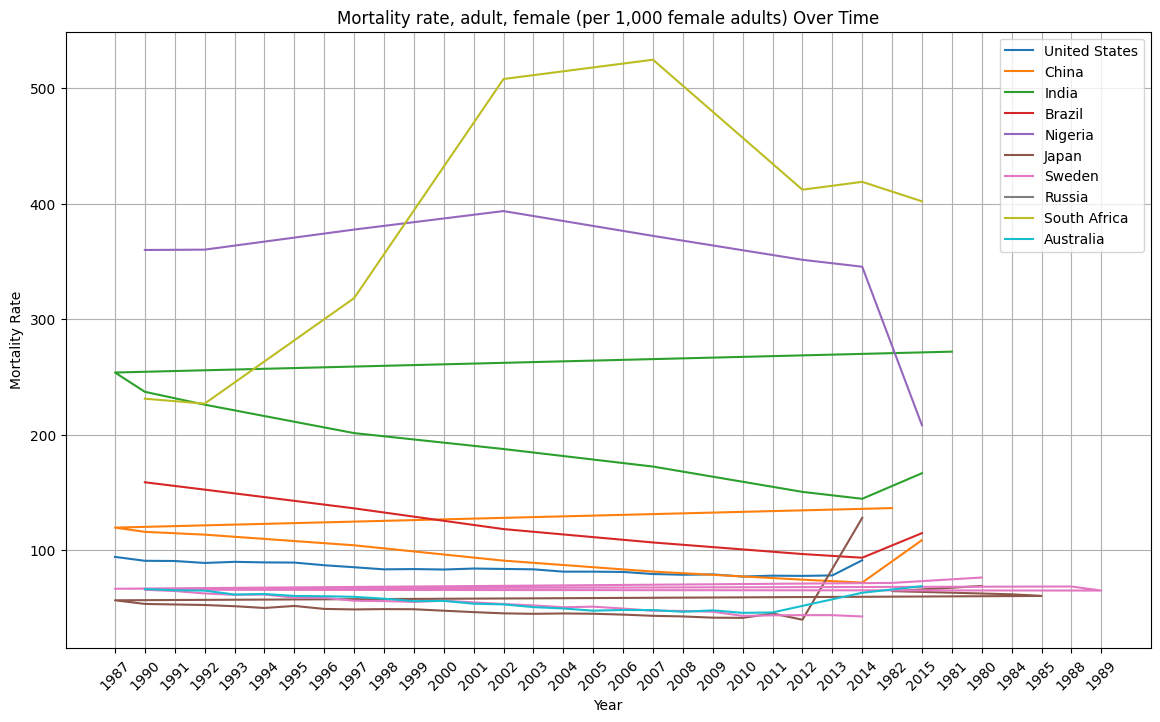

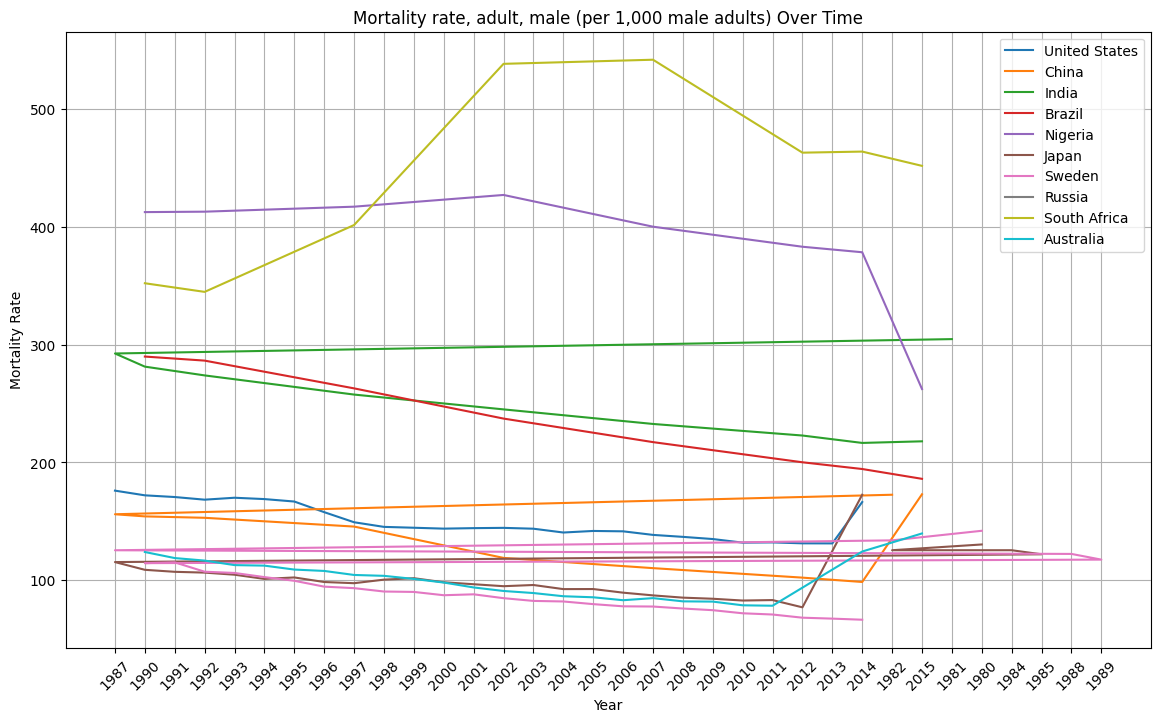

In [27]:
selected_countries = ['United States', 'China', 'India', 'Brazil', 'Nigeria',
                      'Japan', 'Sweden', 'Russia', 'South Africa', 'Australia']

proxy_targets = [
    'Mortality rate, adult, female (per 1,000 female adults)',
    'Mortality rate, adult, male (per 1,000 male adults)']

indicators_to_exclude = [
    'Mortality rate, infant (per 1,000 live births)',
    'Mortality rate, infant, female (per 1,000 live births)',
    'Mortality rate, infant, male (per 1,000 live births)',
    'Mortality rate, neonatal (per 1,000 live births)',
    'Mortality rate, under-5 (per 1,000)',
    'Mortality rate, under-5, female (per 1,000)',
    'Mortality rate, under-5, male (per 1,000)',
    'Maternal mortality ratio (modeled estimate, per 100,000 live births)',
    'Maternal mortality ratio (national estimate, per 100,000 live births)',
    'Mortality caused by road traffic injury (per 100,000 people)'
]


filtered_df = filtered_health_data_df[filtered_health_data_df['Country Name'].isin(selected_countries)]

# Plotting
# plt.figure(figsize=(14, 8))

for indicator in proxy_targets:
  plt.figure(figsize=(14, 8))
  for country in selected_countries:
      country_data = filtered_df[filtered_df['Country Name'] == country]
      plt.plot(country_data['Year'], country_data[indicator], label=country)
  plt.title(f'{indicator} Over Time')
  plt.xlabel('Year')
  plt.ylabel('Mortality Rate')
  plt.xticks(rotation=45)
  plt.legend()
  plt.grid(True)

plt.show()


In [28]:
# Remove indicators that are direct meaures of mortality rate
filtered_transformed_data_df = filtered_health_data_df.drop(columns=indicators_to_exclude)
# Create target variable (mortality rate = average of male/female mortality rate, assumes even ratio of males:females)
filtered_transformed_data_df['Adult Mortality Rate'] = filtered_transformed_data_df[proxy_targets].mean(axis=1)
# Drop proxy targets (adult male and adult female mortality rates)
filtered_transformed_data_df = filtered_transformed_data_df.drop(columns=proxy_targets)


In [29]:
filtered_transformed_data_df['id'] = filtered_transformed_data_df['Year'].astype(str) + '_' + filtered_transformed_data_df['Country Name']
id_column_index = filtered_transformed_data_df.columns.get_loc('id')
filtered_transformed_data_df.insert(0, filtered_transformed_data_df.columns[id_column_index], filtered_transformed_data_df.pop(filtered_transformed_data_df.columns[id_column_index]))

filtered_transformed_data_df

Indicator Name                id Country Name  Year  \
0               1990_Afghanistan  Afghanistan  1990   
1               1991_Afghanistan  Afghanistan  1991   
2               1992_Afghanistan  Afghanistan  1992   
3               1993_Afghanistan  Afghanistan  1993   
4               1994_Afghanistan  Afghanistan  1994   
...                          ...          ...   ...   
5186               2011_Zimbabwe     Zimbabwe  2011   
5187               2012_Zimbabwe     Zimbabwe  2012   
5188               2013_Zimbabwe     Zimbabwe  2013   
5189               2014_Zimbabwe     Zimbabwe  2014   
5190               2015_Zimbabwe     Zimbabwe  2015   

Indicator Name  % of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)  \
0                                                            1.31                                                                       
1                                                            1.31                                                                       
2                                                            1.31                                                                       
3                                                            1.31                                                                       
4                                                            1.31                                                                       
...                                                           ...                                                                       
5186                                                        55.90                                                                       
5187                                                        58.10                                                                       
5188                                                        60.30                                                                       
5189                                                        62.50                                                                       
5190                                                        62.50                                                                       

Indicator Name  % of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)  \
0                                                           20.08                                                                     
1                                                           20.08                                                                     
2                                                           20.08                                                                     
3                                                           20.08                                                                     
4                                                           20.08                                                                     
...                                                           ...                                                                     
5186                                                        53.00                                                                     
5187                                                        55.20                                                                     
5188                                                        57.40                                                                     
5189                                                        59.60                                                                     
5190                                                        59.60                                                                     

Indicator Name  AIDS estimated deaths (UNAIDS estimates)  \
0            

In [30]:
country_list = set(transformed_data_df['Country Name'].values)
country_list

{'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean small states',
 'Cayman Islands',
 'Central African Republic',
 'Central Europe and the Baltics',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (IDA & IBRD coun

In [31]:
num_countries = len(country_list)
country_list = list(country_list)
first_half = country_list[:num_countries // 2]
second_half = country_list[num_countries // 2:]

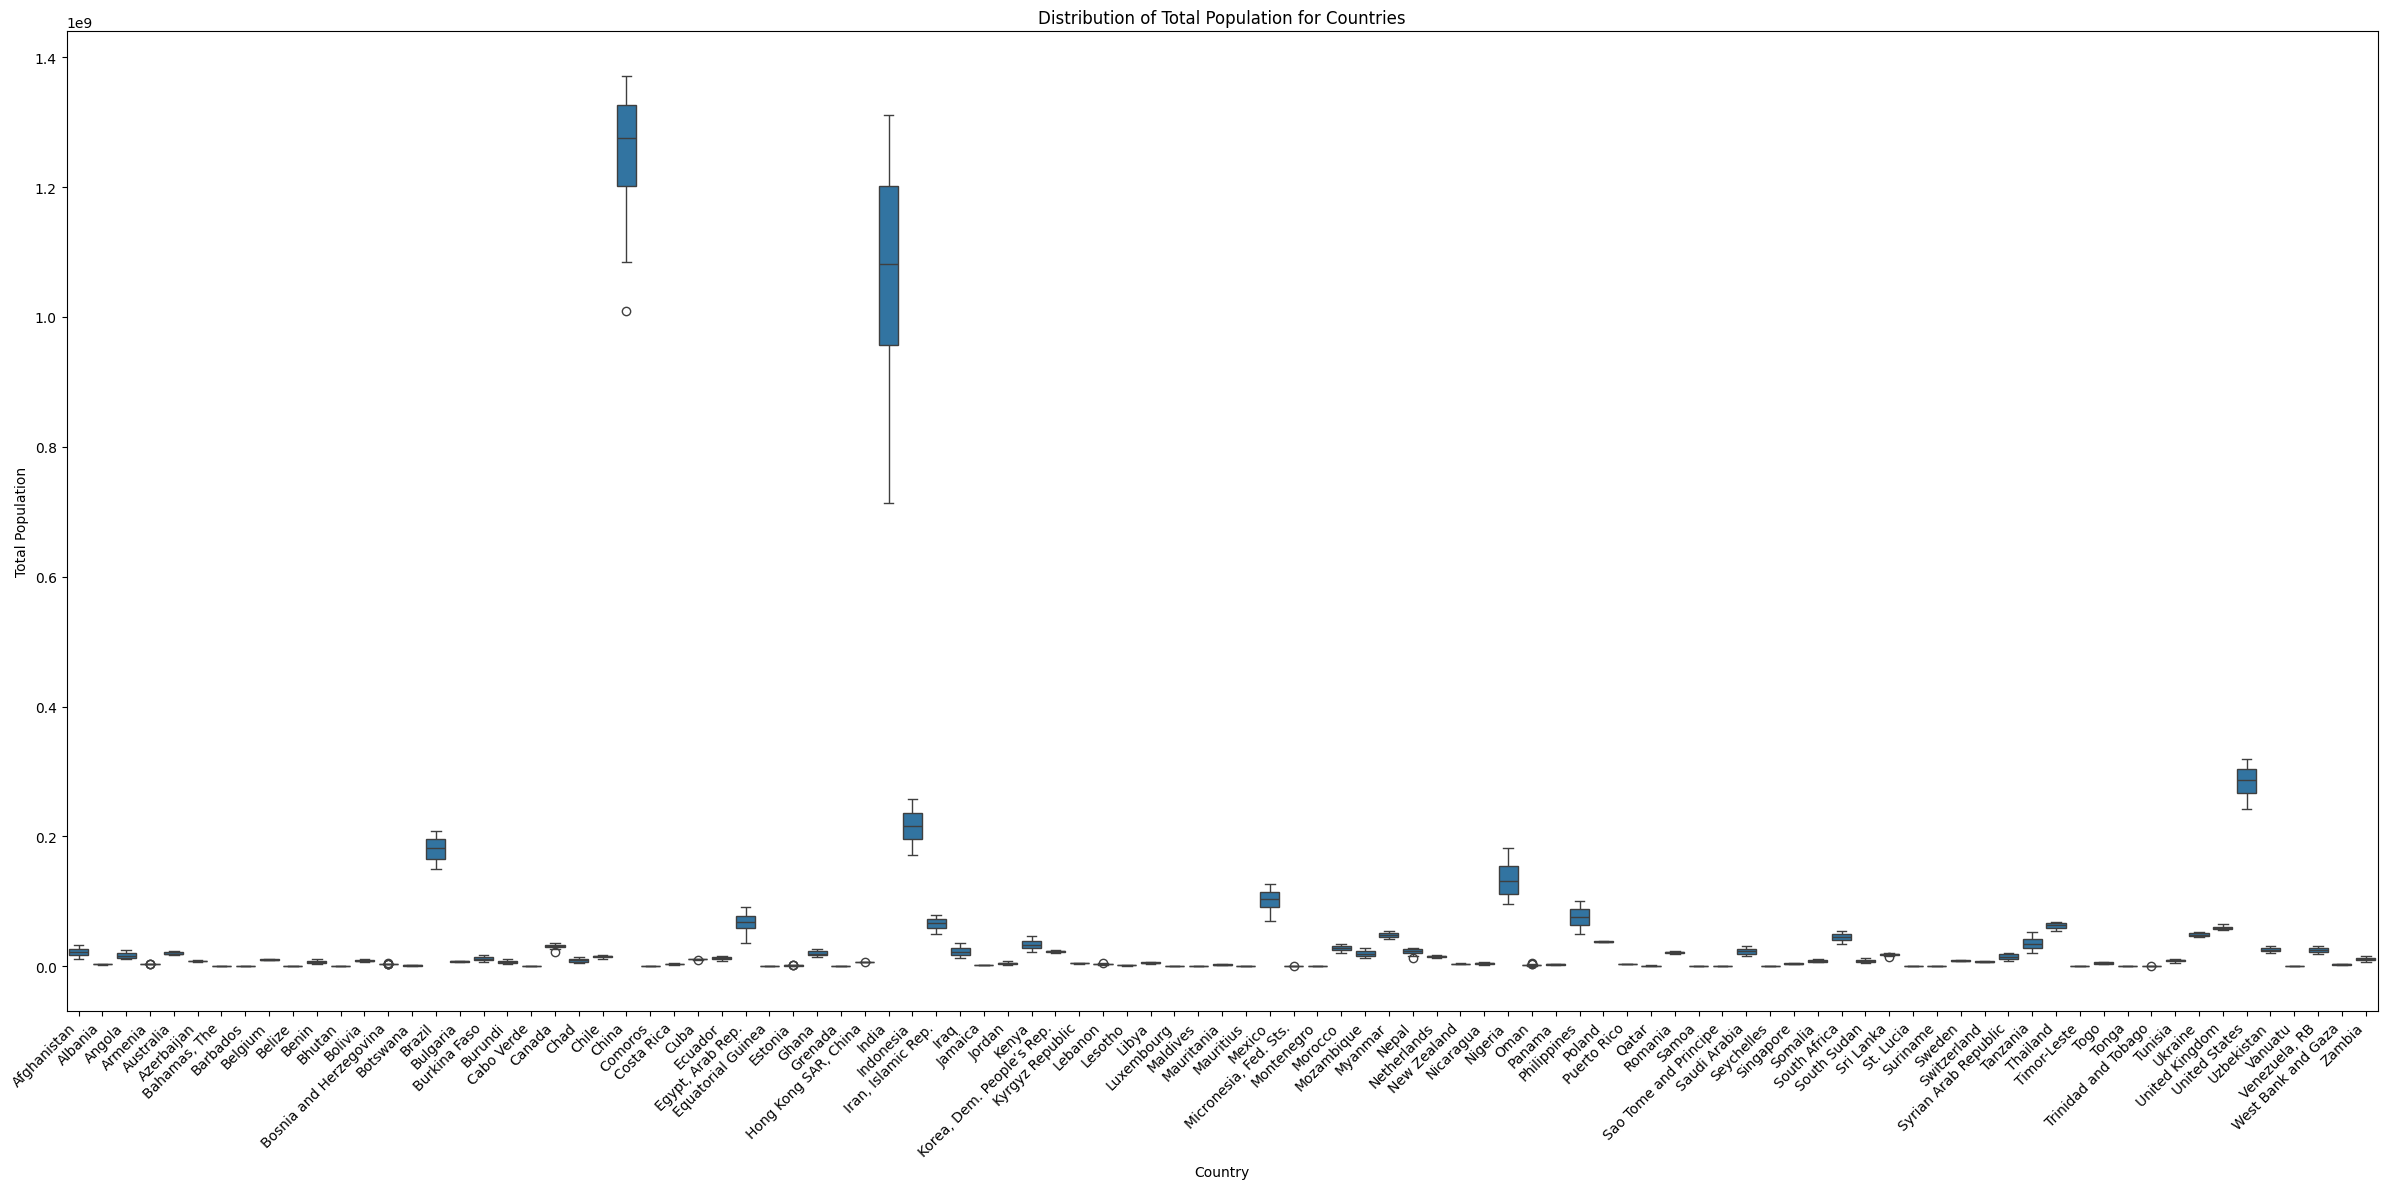

In [32]:
# Plot distribution of populations

population_df = filtered_transformed_data_df[filtered_transformed_data_df['Country Name'].isin(first_half)]

plt.figure(figsize=(24, 12))
sns.boxplot(x='Country Name', y='Population, total', data=population_df)
plt.title('Distribution of Total Population for Countries')
plt.xlabel('Country')
plt.ylabel('Total Population')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

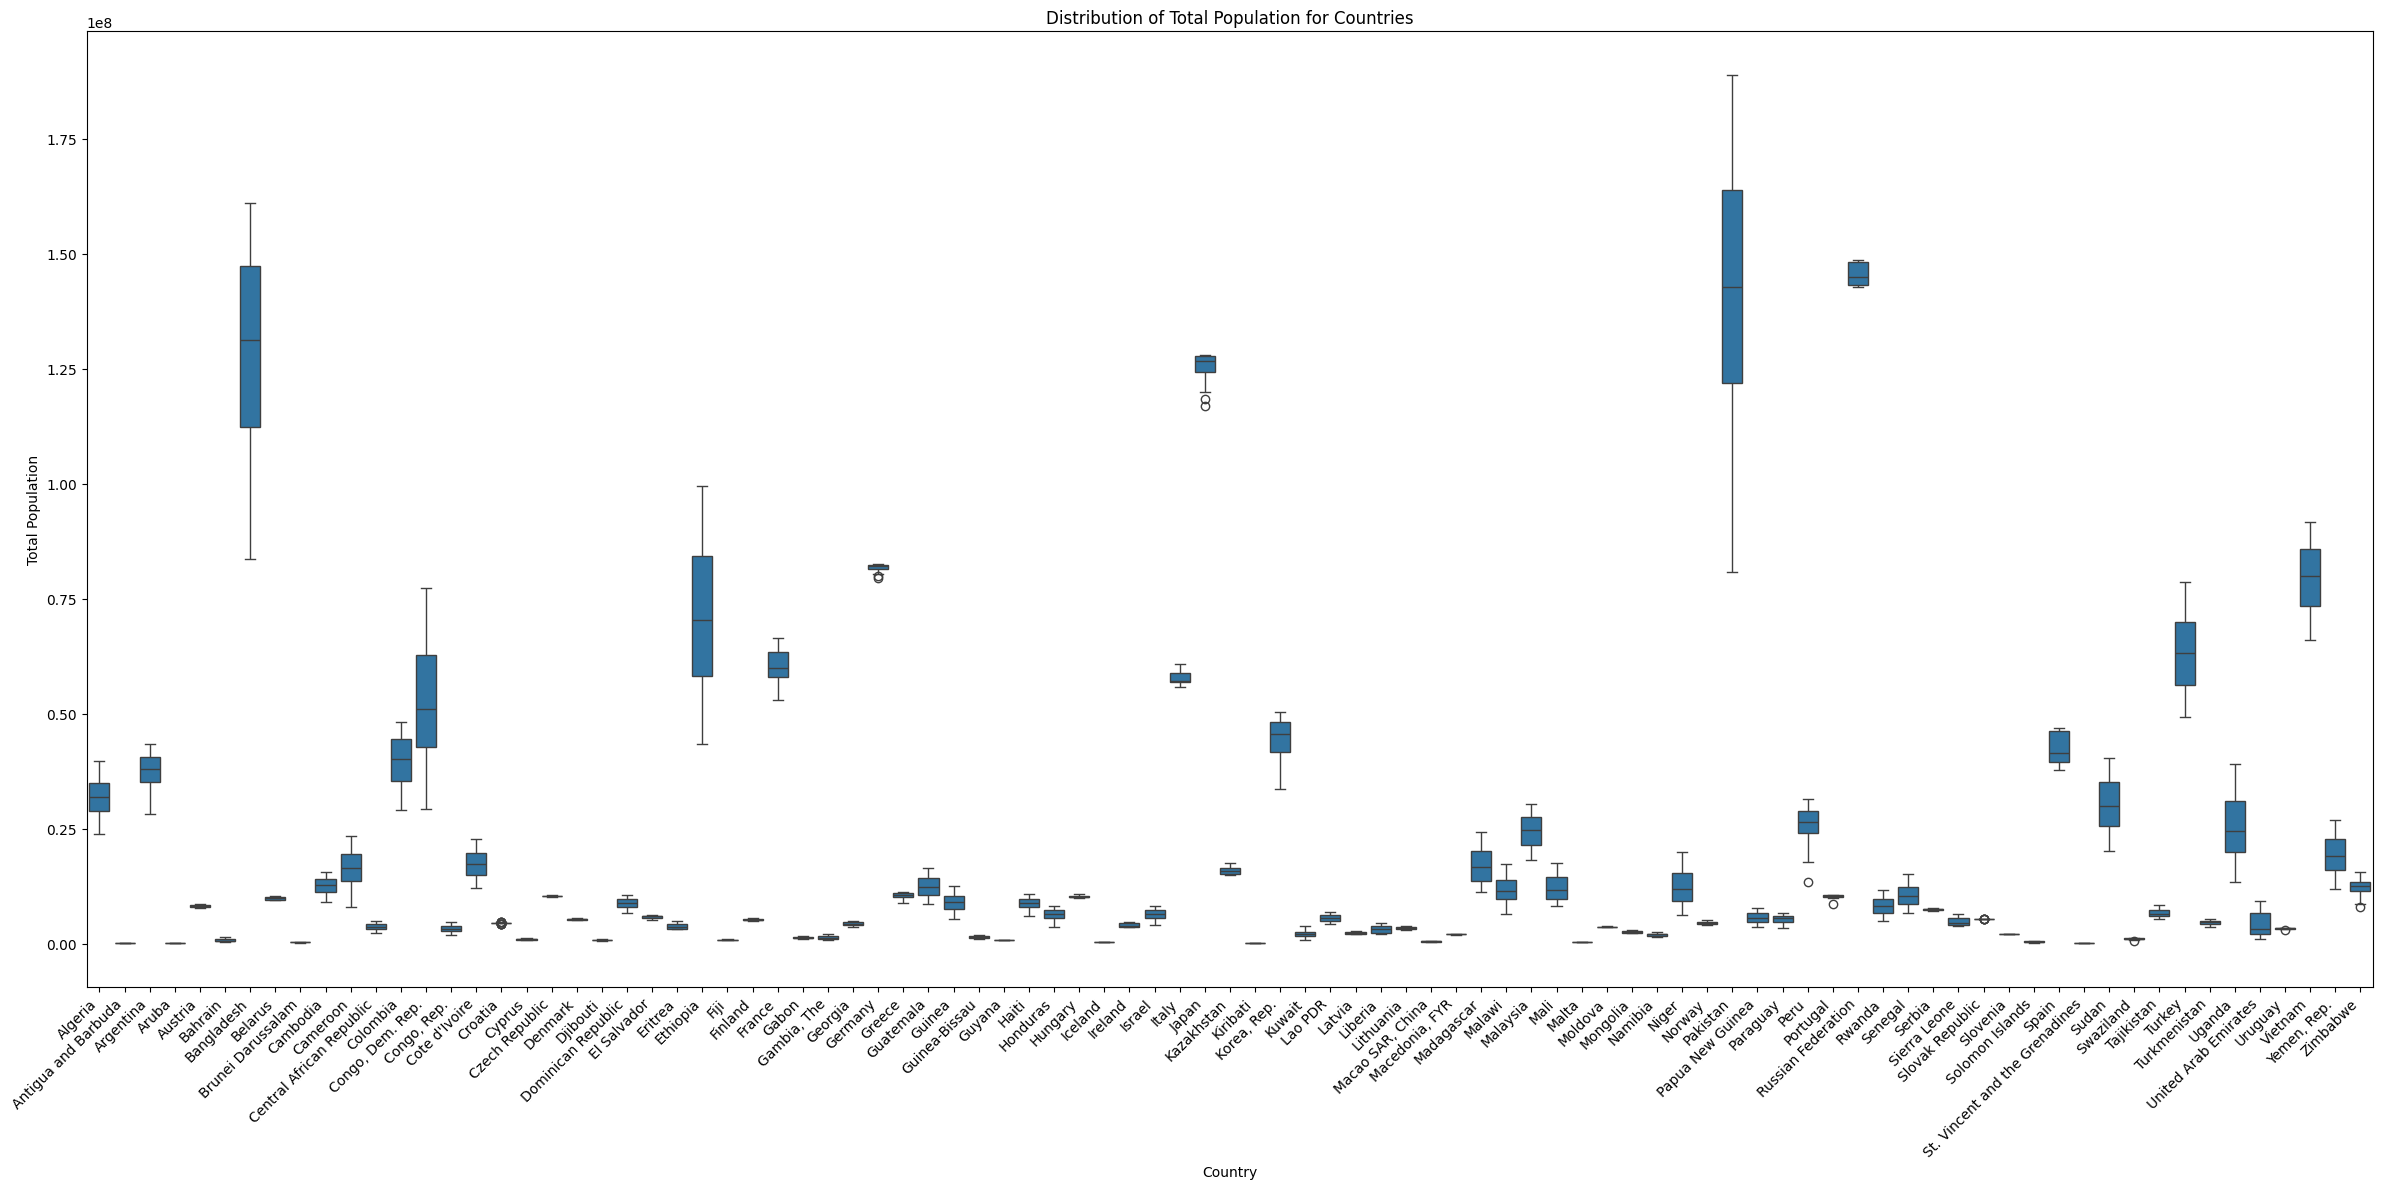

In [33]:
# Second half
population_df = filtered_transformed_data_df[filtered_transformed_data_df['Country Name'].isin(second_half)]

plt.figure(figsize=(24, 12))
sns.boxplot(x='Country Name', y='Population, total', data=population_df)
plt.title('Distribution of Total Population for Countries')
plt.xlabel('Country')
plt.ylabel('Total Population')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

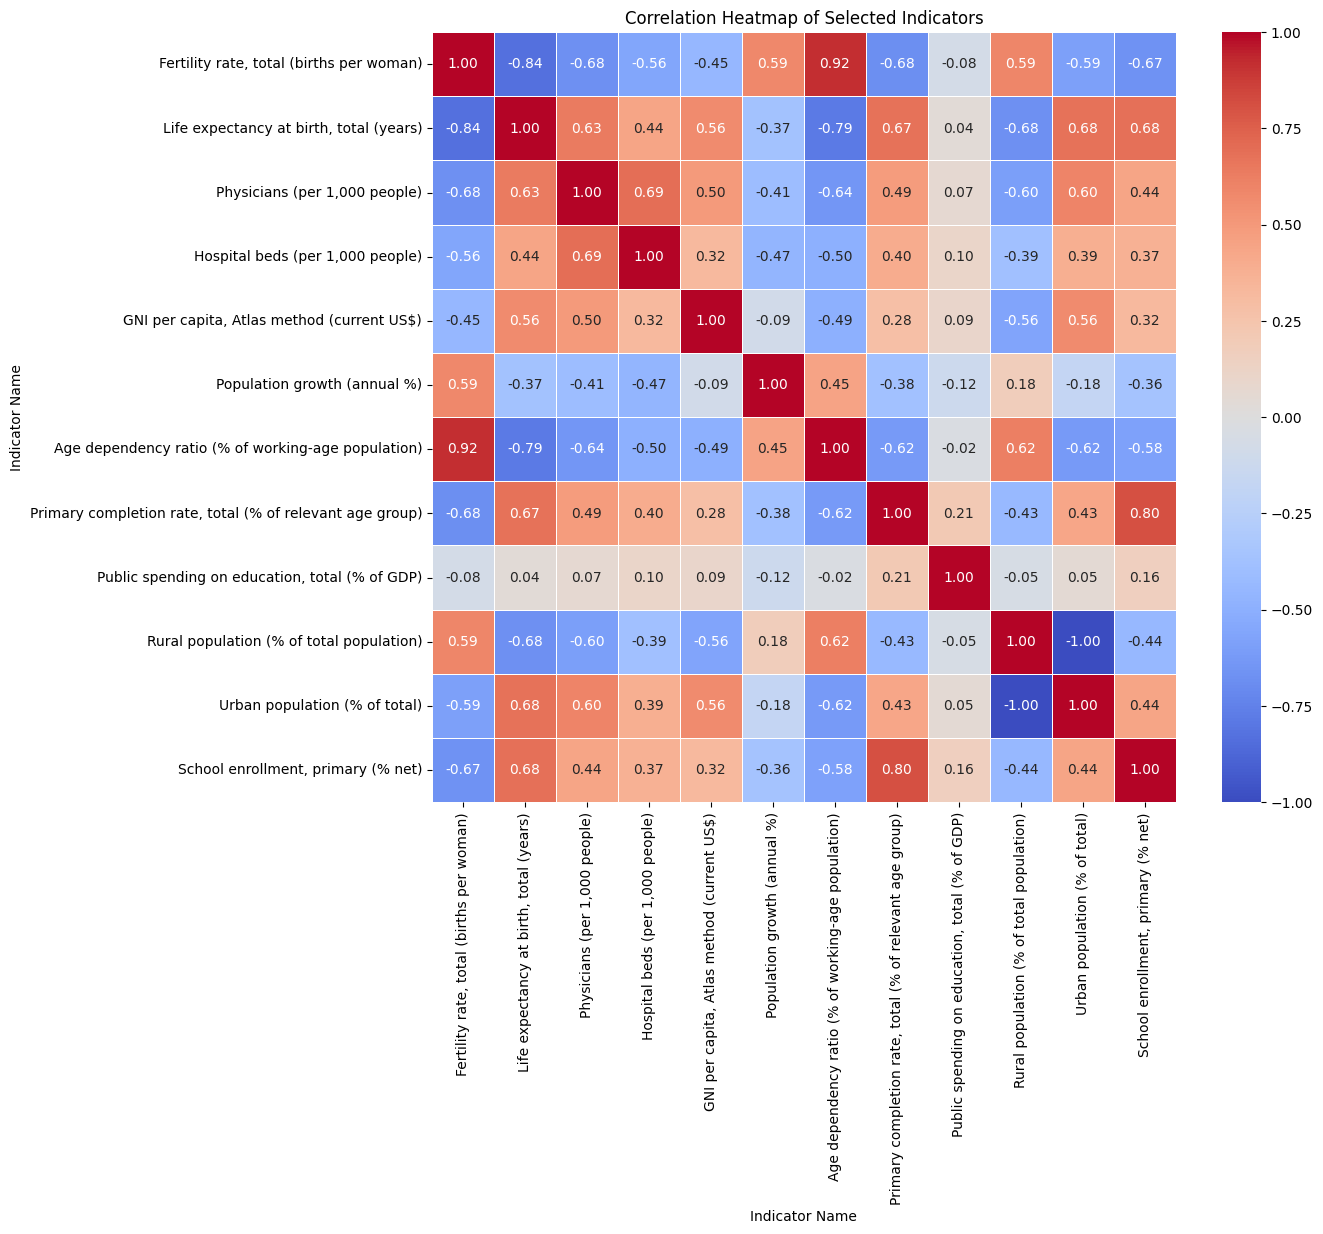

In [34]:
selected_indicators = [
    'Fertility rate, total (births per woman)',
    'Life expectancy at birth, total (years)',
    'Physicians (per 1,000 people)',
    'Hospital beds (per 1,000 people)',
    'GNI per capita, Atlas method (current US$)',
    'Population growth (annual %)',
    'Age dependency ratio (% of working-age population)',
    'Primary completion rate, total (% of relevant age group)',
    'Public spending on education, total (% of GDP)',
    'Rural population (% of total population)',
    'Urban population (% of total)',
    'School enrollment, primary (% net)',
]

selected_df = filtered_transformed_data_df[selected_indicators]
selected_df

correlation_matrix = selected_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Selected Indicators')
plt.show()


In [35]:
final_df = filtered_transformed_data_df.drop(['Year', 'Country Name'], axis=1)
final_df

Indicator Name                id  \
0               1990_Afghanistan   
1               1991_Afghanistan   
2               1992_Afghanistan   
3               1993_Afghanistan   
4               1994_Afghanistan   
...                          ...   
5186               2011_Zimbabwe   
5187               2012_Zimbabwe   
5188               2013_Zimbabwe   
5189               2014_Zimbabwe   
5190               2015_Zimbabwe   

Indicator Name  % of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)  \
0                                                            1.31                                                                       
1                                                            1.31                                                                       
2                                                            1.31                                                                       
3                                                            1.31                                                                       
4                                                            1.31                                                                       
...                                                           ...                                                                       
5186                                                        55.90                                                                       
5187                                                        58.10                                                                       
5188                                                        60.30                                                                       
5189                                                        62.50                                                                       
5190                                                        62.50                                                                       

Indicator Name  % of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)  \
0                                                           20.08                                                                     
1                                                           20.08                                                                     
2                                                           20.08                                                                     
3                                                           20.08                                                                     
4                                                           20.08                                                                     
...                                                           ...                                                                     
5186                                                        53.00                                                                     
5187                                                        55.20                                                                     
5188                                                        57.40                                                                     
5189                                                        59.60                                                                     
5190                                                        59.60                                                                     

Indicator Name  AIDS estimated deaths (UNAIDS estimates)  \
0                                                 100.00   
1                                                 100.00   
2                                                 100.00   
3                                                 100.00   
4

In [36]:
features = final_df.drop(columns=['id', 'Adult Mortality Rate'])
features

Indicator Name  % of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)  \
0                                                            1.31                                                                       
1                                                            1.31                                                                       
2                                                            1.31                                                                       
3                                                            1.31                                                                       
4                                                            1.31                                                                       
...                                                           ...                                                                       
5186                                                        55.90                                                                       
5187                                                        58.10                                                                       
5188                                                        60.30                                                                       
5189                                                        62.50                                                                       
5190                                                        62.50                                                                       

Indicator Name  % of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)  \
0                                                           20.08                                                                     
1                                                           20.08                                                                     
2                                                           20.08                                                                     
3                                                           20.08                                                                     
4                                                           20.08                                                                     
...                                                           ...                                                                     
5186                                                        53.00                                                                     
5187                                                        55.20                                                                     
5188                                                        57.40                                                                     
5189                                                        59.60                                                                     
5190                                                        59.60                                                                     

Indicator Name  AIDS estimated deaths (UNAIDS estimates)  \
0                                                 100.00   
1                                                 100.00   
2                                                 100.00   
3                                                 100.00   
4                                                 100.00   
...                                                  ...   
5186                                            43000.00   
5187                                            37000.00   
5188                                            35000.00   
5189                                            30000.00   
5190                                            29000.00   

Indicator Nam

In [37]:
target = final_df['Adult Mortality Rate']
target

0      372.05
1      363.57
2      355.10
3      349.83
4      344.56
        ...  
5186   508.24
5187   463.64
5188   430.50
5189   397.37
5190   397.37
Name: Adult Mortality Rate, Length: 5191, dtype: float64

In [38]:
# Assign seed value and conduct 80/20 train-test split with random_state = seed
seed = 42
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed)

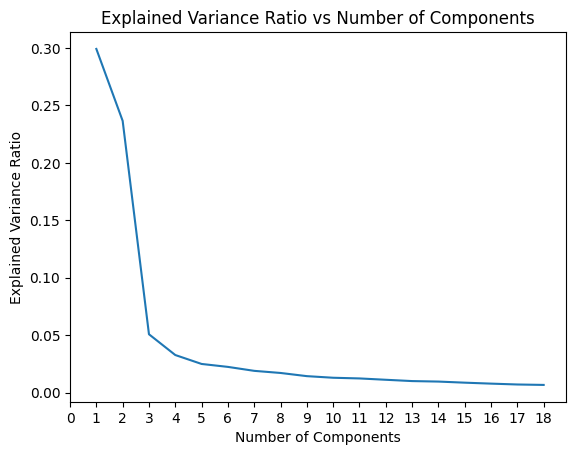

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit PCA on scaled training data to explain >= 80% of variance
pca = PCA(n_components=0.8)
pca.fit(X_train_scaled)

import matplotlib.pyplot as plt

plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_)
plt.title('Explained Variance Ratio vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(pca.n_components_+1))
plt.show()

In [40]:
explained_variance_ratios = pca.explained_variance_ratio_
cum_evr = explained_variance_ratios.cumsum()

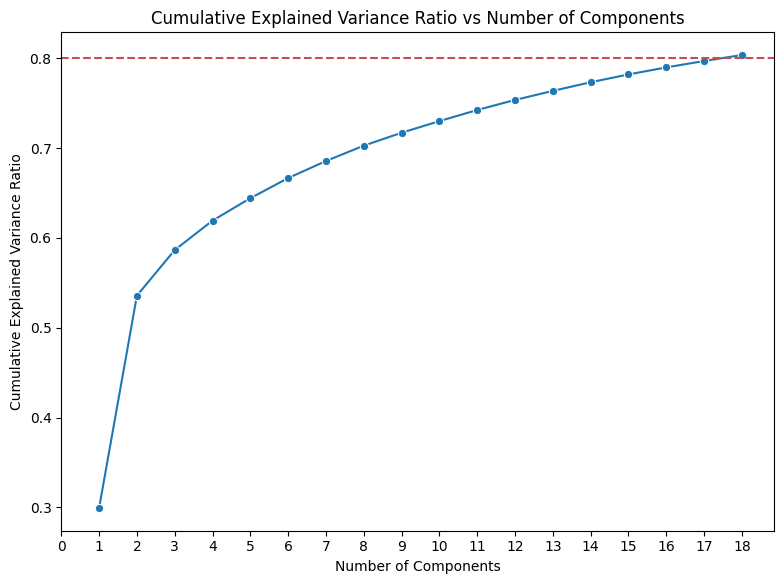

In [41]:
n_components = len(explained_variance_ratios)

plt.figure(figsize=(8,6))
sns.lineplot(x=range(1, n_components + 1), y=cum_evr, marker='o')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Variance Threshold')

plt.title('Cumulative Explained Variance Ratio vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(len(cum_evr)+1))

sns.set(style="whitegrid")

plt.tight_layout()
plt.show()

In [42]:
# Transform on training+testing sets
X_train_pca = pca.transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

## Modeling: Linear Regression


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [44]:
# Initialize LinearRegression model w/ default parameters and fit it on the training set
reg = LinearRegression()
reg.fit(X_train_pca, y_train)

# Use the model to predict on the PCA transformed test set
y_pred = reg.predict(X_test_pca)

In [45]:
# Find the R-squared score for the model on the test data
r2_test = r2_score(y_test, y_pred)
r2_test

0.8623866841601485

### Ridge Regularization

Before deciding to apply ridge regularization to our standard linear regression model, we will first assess whether our original model may be overfitting the training data

In [46]:
# Use the trained model to predict on the training set
y_pred_train = reg.predict(X_train_pca)

# Find the R-squared score for the model on the training data
r2_train = r2_score(y_train, y_pred_train)
r2_train

0.854199295626816

Since the R-squared score is not significantly higher on the training dataset compared to the testing dataset (in fact they are approximately equal), it does not appear that our original model is overfitting the training data.

We will still perform $L_2$ Regularized Linear Regression to illustrate this fact.

In [54]:
from sklearn.linear_model import Ridge
# Initialize model with alpha = 10 (keep other hyperparameters as default values) and fit on the training set
reg_ridge = Ridge(alpha=10)
reg_ridge.fit(X_train_pca, y_train)

# Use the model to predict on the PCA transformed test set
y_pred_ridge = reg_ridge.predict(X_test_pca)

# Find the R-squared score for the Ridge regression model
ridge_score = r2_score(y_test, y_pred_ridge)
ridge_score

0.8623704608619651

As shown, there is no signifcant difference in R-squared score between the Ridge regression and standard linear regression models.